In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# シンプルデータセット2の作成

In [2]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# 決定木のスクラッチ（ScratchDecesionTreeClassifierDepth1）

In [3]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
        self.feature_index = None
        self.threshold = None
        self.left_label = None
        self.right_label = None
        
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        
        ig_max, feature_index, threshold = dt.get_max_ig(X, y)
        self.feature_index = feature_index
        self.threshold = threshold
        
        # 左の子ノードのラベルを取得
        self.left_label = np.argmax(np.bincount(y[X[:, self.feature_index] >= self.threshold]))
        
        # 右の子ノードのラベルを取得
        self.right_label = np.argmax(np.bincount(y[X[:, self.feature_index] < self.threshold]))        
        
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("最大の情報利得： {}".format(ig_max))
            print("分割対象の特徴量のインデックス： {}".format(feature_index))
            print("閾値： {}".format(threshold))
            print("左の子ノードのラベル： {}".format(self.left_label))
            print("右の子ノードのラベル： {}".format(self.right_label))            
            
    
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量        
        
        Returns
        y_pred : 次の形のndarray, shape (n_samples, )
             推定値
        """
        y_pred = np.where(X[:, self.feature_index] >= self.threshold, self.left_label, self.right_label)
        
        return y_pred
    
    
    def calc_gini(self, y):
        """
        gini不純度を計算する
        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
            
        Returns
        gini : float
          ジニ不純度    
        """
        gini = 0
        score = 0
        
        # giniの算出
        for cls in np.unique(y):
            score  = score  + (len(y[y==cls]) / len(y)) ** 2
            
        gini = 1 - score

        return gini
    
    
    def calc_information_gain(self, X, y, index, threshold):
        """
        情報利得を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        index : int
            特徴量のインデックス         
        index : float
            閾値                
            
        Returns
        ig : float
          情報利得
        """
        gini = 0
        
        # 親ノードのginiの算出
        gini_parent = self.calc_gini(y)
        
        # 閾値以上のginiの算出（左の子ノード）
        y_left = y[X[:, index] >= threshold] # 閾値以上の目的変数
        gini_left = self.calc_gini(y_left)
        
        # 閾値未満のginiの算出（右の子ノード）
        y_right = y[X[:, index] < threshold] # 閾値未満の目的変数
        gini_right = self.calc_gini(y_right)
        
        ig = gini_parent  - gini_left * len(y_left) / len(y) - gini_right * len(y_right) / len(y) 
        
        return ig
    
    
    def get_max_ig(self, X, y):
        """
        最大の情報利得を求める
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
            
        Returns
        ig_max : float
            最大の情報利得
        feature_index : int
            特徴量のインデックス           
        threshold : float
            閾値        
        """
        ig_max = 0
        feature_index = None
        threshold = None
        ig = None

        for idx in range(X.shape[1]):
            values = X[:, idx]
            for val in values:
                ig = self.calc_information_gain(X, y, idx, val)
                if ig_max < ig:
                    ig_max = ig
                    threshold = val
                    feature_index = idx   
        
        return ig_max, feature_index, threshold
            

# 【問題1】不純度を求める関数

# $I(t) = 1-\sum_{i=1}^{K}P^2(C_i|t) = 1-\sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^{2}$

## calc_gini の実装
```python 
def calc_gini(self, y):
    """
    gini不純度を計算する
    Parameters
    ----------
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値

    Returns
    gini : float
      ジニ不純度    
    """
    gini = 0
    score = 0

    # giniの算出
    for cls in np.unique(y):
        score  = score  + (len(y[y==cls]) / len(y)) ** 2

    gini = 1 - score

    return gini
```

## gini不純度を計算

In [4]:
# サンプルデータ
print(y)
print(len(y))
print(len(y[y==0]))
print(len(y[y==1]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
40
20
20


## $1-\left( \left( \dfrac {20}{40}\right) ^{2}+\left( \dfrac {20}{40}\right) ^{2}\right) =0.5$

In [5]:
# gini不純度を計算
dt = ScratchDecesionTreeClassifierDepth1()
gini = dt.calc_gini(y)
print(gini)

0.5


# 【問題2】情報利得を求める関数

## 情報利得を求める関数の実装
```python 
def calc_information_gain(self, X, y, index, threshold):
    """
    情報利得を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    index : int
        特徴量のインデックス         
    index : float
        閾値                

    Returns
    ig : float
      情報利得
    """
    gini = 0

    # 親ノードのginiの算出
    gini_parent = self.calc_gini(y)

    # 閾値以上のginiの算出（左の子ノード）
    y_left = y[X[:, index] >= threshold] # 閾値以上の目的変数
    gini_left = self.calc_gini(y_left)

    # 閾値未満のginiの算出（右の子ノード）
    y_right = y[X[:, index] < threshold] # 閾値未満の目的変数
    gini_right = self.calc_gini(y_right)

    ig = gini_parent  - gini_left * len(y_left) / len(y) - gini_right * len(y_right) / len(y) 

    return ig
```

## 情報利得を計算

In [6]:
feature_index = 0
threshold = -0.65259

In [7]:
# 情報利得を求める
dt = ScratchDecesionTreeClassifierDepth1()
gini = dt.calc_information_gain(X, y, feature_index, threshold)
print(gini)

0.005050505050504944


# 【問題3】学習

## 最大の情報利得を求める関数の実装
```python 
def get_max_ig(self, X, y):
    """
    最大の情報利得を求める
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値

    Returns
    ig_max : float
        最大の情報利得
    feature_index : int
        特徴量のインデックス           
    threshold : float
        閾値        
    """
    ig_max = 0
    feature_index = None
    threshold = None
    ig = None

    for idx in range(X.shape[1]):
        values = X[:, idx]
        for val in values:
            ig = self.calc_information_gain(X, y, idx, val)
            if ig_max < ig:
                ig_max = ig
                threshold = val
                feature_index = idx   

    return ig_max, feature_index, threshold
```

## fit の実装
```python 
def fit(self, X, y):
    """
    決定木分類器を学習する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    """

    ig_max, feature_index, threshold = dt.get_max_ig(X, y)
    self.feature_index = feature_index
    self.threshold = threshold

    # 左の子ノードのラベルを取得
    self.left_label = np.argmax(np.bincount(y[X[:, self.feature_index] >= self.threshold]))

    # 右の子ノードのラベルを取得
    self.right_label = np.argmax(np.bincount(y[X[:, self.feature_index] < self.threshold]))        


    if self.verbose:
        #verboseをTrueにした際は学習過程を出力
        print("最大の情報利得： {}".format(ig_max))
        print("分割対象の特徴量のインデックス： {}".format(feature_index))
        print("閾値： {}".format(threshold))
        print("左の子ノードのラベル： {}".format(self.left_label))
        print("右の子ノードのラベル： {}".format(self.right_label))     
```

## 学習

In [8]:
dt = ScratchDecesionTreeClassifierDepth1(True)
dt.fit(X, y)

最大の情報利得： 0.07680250783699061
分割対象の特徴量のインデックス： 1
閾値： 5.3524
左の子ノードのラベル： 1
右の子ノードのラベル： 0


# 【問題4】推定

## predict の実装
```python 
def predict(self, X):
    """
    決定木分類器を使いラベルを推定する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量        

    Returns
    y_pred : 次の形のndarray, shape (n_samples, )
         推定値
    """
    y_pred = np.where(X[:, self.feature_index] >= self.threshold, self.left_label, self.right_label)

    return y_pred 
```

## 推定

In [9]:
dt.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

# 【問題5】学習と推定

# ① 今回のスクラッチを利用したとき

In [10]:
#　訓練データと検証データに分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0) # 訓練データ70%、検証データ30%として分割

In [11]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)

In [12]:
# 学習
dt = ScratchDecesionTreeClassifierDepth1(True)
dt.fit(X_train_std, y_train)

最大の情報利得： 0.13494897959183677
分割対象の特徴量のインデックス： 1
閾値： 0.5927312019831511
左の子ノードのラベル： 1
右の子ノードのラベル： 0


In [13]:
# 推定（testデータ）
y_val_pred = dt.predict(X_val_std)
print(y_val_pred)
print(y_val)

[1 0 0 0 0 0 0 0 1 1 0 0]
[1 1 1 0 0 0 1 0 0 1 1 1]


In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy（正解率）：　{}\n".format(accuracy_score(y_val, y_val_pred)))

from sklearn.metrics import precision_score
print("Precision（適合率）：　{}\n".format(precision_score(y_val, y_val_pred, average='macro')))

from sklearn.metrics import recall_score
print("Recall（再現率）：　{}\n".format(recall_score(y_val, y_val_pred, average='macro')))

Accuracy（正解率）：　0.5

Precision（適合率）：　0.5555555555555556

Recall（再現率）：　0.5428571428571429



# ② scikit-learnによる実装のとき

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(max_depth=1) # 決定木のインスタンスを生成
clf_tree.fit(X_train_std, y_train)
y_pred_tree = clf_tree.predict(X_val_std) # 予測

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy（正解率）：　{}\n".format(accuracy_score(y_val, y_pred_tree)))

from sklearn.metrics import precision_score
print("Precision（適合率）：　{}\n".format(precision_score(y_val, y_pred_tree, average='macro')))

from sklearn.metrics import recall_score
print("Recall（再現率）：　{}\n".format(recall_score(y_val, y_pred_tree, average='macro')))

Accuracy（正解率）：　0.5

Precision（適合率）：　0.5555555555555556

Recall（再現率）：　0.5428571428571429



## 「① 今回のスクラッチを利用したとき」と「② scikit-learnによる実装のとき」は検証結果が同じとなった

# 【問題6】決定領域の可視化

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 決定領域を表示する関数
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

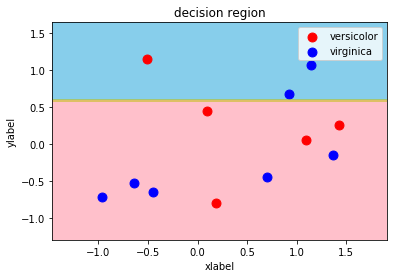

In [18]:
decision_region(X_val_std, y_val, dt, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

# 【問題7】（アドバンス課題）深さ2の決定木分類器クラスの作成

## 注）【問題7】と【問題８】のクラスは同じ構造で実装してあります。

## ① 深さ2の決定木分類器クラス

In [19]:
class ScratchDecesionTreeClassifierDepth2():
    """
    深さに制限のない決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose, max_depth):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.max_depth = max_depth
        
        self.tree = None
        
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        
        # ルートノードの作成
        self.tree = Node(self.verbose, self.max_depth)
        # ルートノードの分割
        self.tree.split_node(X, y, current_depth = 0)
   
    
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量        
        
        Returns
        y_pred : 次の形のndarray, shape (n_samples, )
             推定値
        """
        
        y_pred = []
        for Xi in X:
            y_pred.append(self.tree.predict(Xi))
        
        return y_pred

## ② ノードクラス

In [20]:
class Node():
    
    def __init__(self, verbose, max_depth):
        self.verbose = verbose                    # verboseをTrueにした際は学習過程を出力
        self.max_depth = max_depth        # 最大の深さ
        self.feature_idx = None                  # 分割対象の特徴量のインデックス
        self.threshold = None                      # 閾値
        self.left = None                                 # 左のノードオブジェクト
        self.right = None                               # 右のノードオブジェクト
        self.label = None                               # ノードのクラス
        
        
    def split_node(self, X, y, current_depth):
        
        # ノードの「現在の深さ」が「最大の深さ」と等しい場合、または目的変数のクラスの種類が「１つ」の場合
        if current_depth == self.max_depth or len(np.unique(y)) == 1:
            self.label = np.argmax(np.bincount(y)) #最も多いクラスの値を取得
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("現在の深さ： {}".format(current_depth))
                print("ラベルの値： {}".format(self.label))            
            return
        
        # 最大の情報利得になる値を取得
        ig_max, feature_idx, threshold = self.get_max_ig(X, y)
        
        self.feature_idx = feature_idx         # 分割対象の特徴量のインデックス
        self.threshold = threshold                # 閾値
        
        left_idx = np.where(X[:, self.feature_idx] < self.threshold)          # 閾値未満の特徴量のインデックスを取得
        right_idx = np.where(X[:, self.feature_idx] >= self.threshold)     # 閾値以上の特徴量のインデックスを取得
        
        self.left = Node(self.verbose, self.max_depth)           # 左の子ノードのオブジェクトを作成
        self.right = Node(self.verbose, self.max_depth)         # 右の子ノードのオブジェクトを作成
        
        self.left.split_node(X[left_idx], y[left_idx], current_depth + 1)           # 左の子ノードの「split_node」を呼び出し
        self.right.split_node(X[right_idx], y[right_idx], current_depth + 1)    # 右の子ノードの「split_node」を呼び出し

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("現在の深さ： {}".format(current_depth))
            print("最大の情報利得： {}".format(ig_max))
            print("分割対象の特徴量のインデックス： {}".format(feature_index))
            print("閾値： {}".format(threshold))
        
        
    def calc_gini(self, y):
        """
        gini不純度を計算する
        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
            
        Returns
        gini : float
          ジニ不純度    
        """
        gini = 0
        score = 0
        
        # giniの算出
        for cls in np.unique(y):
            score  = score  + (len(y[y==cls]) / len(y)) ** 2
        gini = 1 - score

        return gini
    
    
    def calc_information_gain(self, X, y, index, threshold):
        """
        情報利得を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        index : int
            特徴量のインデックス         
        index : float
            閾値                
            
        Returns
        ig : float
          情報利得
        """
        gini = 0
        
        # 親ノードのginiの算出
        gini_parent = self.calc_gini(y)
        
        # 閾値未満のginiの算出（左の子ノード）
        y_left = y[X[:, index] < threshold] # 閾値未満の目的変数
        gini_left = self.calc_gini(y_left)
        
        # 閾値以上のginiの算出（右の子ノード）
        y_right = y[X[:, index] >= threshold] # 閾値以上の目的変数
        gini_right = self.calc_gini(y_right)
        
        # 情報利得を計算
        ig = gini_parent  - gini_left * len(y_left) / len(y) - gini_right * len(y_right) / len(y) 
        
        return ig
    
    
    def get_max_ig(self, X, y):
        """
        最大の情報利得を求める
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
            
        Returns
        ig_max : float
            最大の情報利得
        feature_index : int
            特徴量のインデックス           
        threshold : float
            閾値        
        """
        ig_max = 0
        feature_index = None
        threshold = None
        ig = None
        
        # すべての特徴量の値について情報利得を計算する
        for idx in range(X.shape[1]):
            values = X[:, idx]
            for val in values:
                ig = self.calc_information_gain(X, y, idx, val)
                if ig_max < ig:
                    ig_max = ig
                    threshold = val
                    feature_index = idx   
        
        return ig_max, feature_index, threshold    
    
    def predict(self, Xi):
        """
        最大の情報利得を求める
        Parameters
        ----------
        X : 次の形のndarray, shape (1, n_features)
            推定データの特徴量

        Returns
        label : object
            ラベル 
        """        
        
        # ラベルに値がある（子ノードがない）場合
        if self.label is not None:
            return self.label
        
        if Xi[self.feature_idx] < self.threshold:        #  閾値未満の場合
            return self.left.predict(Xi)                         # 左の子ノードの「predict」を呼び出し
        elif Xi[self.feature_idx] >= self.threshold:  #  閾値以上の場合
            return self.right.predict(Xi)                       # 右の子ノードの「predict」を呼び出し

## 学習と推定

## ① 深さが「2」の学習と推定

In [21]:
# 学習（深さが4の場合）
dt2 = ScratchDecesionTreeClassifierDepth2(verbose=True, max_depth=2)
dt2.fit(X_train_std, y_train)

現在の深さ： 2
ラベルの値： 0
現在の深さ： 2
ラベルの値： 1
現在の深さ： 1
最大の情報利得： 0.051578947368421
分割対象の特徴量のインデックス： 0
閾値： 1.2376627691639501
現在の深さ： 2
ラベルの値： 1
現在の深さ： 2
ラベルの値： 1
現在の深さ： 1
最大の情報利得： 0.05208333333333334
分割対象の特徴量のインデックス： 0
閾値： 1.2663521994222138
現在の深さ： 0
最大の情報利得： 0.13494897959183677
分割対象の特徴量のインデックス： 0
閾値： 0.5927312019831511


In [22]:
y2_val_pred = dt2.predict(X_val_std)

In [23]:
print(y2_val_pred)

[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0]


In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy（正解率）：　{}\n".format(accuracy_score(y_val, y2_val_pred)))

from sklearn.metrics import precision_score
print("Precision（適合率）：　{}\n".format(precision_score(y_val, y2_val_pred, average='macro')))

from sklearn.metrics import recall_score
print("Recall（再現率）：　{}\n".format(recall_score(y_val, y2_val_pred, average='macro')))

Accuracy（正解率）：　0.5

Precision（適合率）：　0.5142857142857142

Recall（再現率）：　0.5142857142857142



# 【問題8】（アドバンス課題）深さに制限のない決定木分類器クラスの作成

## ① 深さに制限のない決定木分類器クラス

In [25]:
class ScratchDecesionTreeClassifierDepthInf():
    """
    深さに制限のない決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose, max_depth):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.max_depth = max_depth
        
        self.tree = None
        
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        
        # ルートノードの作成
        self.tree = Node(self.verbose, self.max_depth)
        # ルートノードの分割
        self.tree.split_node(X, y, current_depth = 0)
   
    
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量        
        
        Returns
        y_pred : 次の形のndarray, shape (n_samples, )
             推定値
        """
        
        y_pred = []
        for Xi in X:
            y_pred.append(self.tree.predict(Xi))
        
        return y_pred

## ② ノードクラス

In [26]:
class Node():
    
    def __init__(self, verbose, max_depth):
        self.verbose = verbose                    # verboseをTrueにした際は学習過程を出力
        self.max_depth = max_depth        # 最大の深さ
        self.feature_idx = None                  # 分割対象の特徴量のインデックス
        self.threshold = None                      # 閾値
        self.left = None                                 # 左のノードオブジェクト
        self.right = None                               # 右のノードオブジェクト
        self.label = None                               # ノードのクラス
        
        
    def split_node(self, X, y, current_depth):
        
        # ノードの「現在の深さ」が「最大の深さ」と等しい場合、または目的変数のクラスの種類が「１つ」の場合
        if current_depth == self.max_depth or len(np.unique(y)) == 1:
            self.label = np.argmax(np.bincount(y)) #最も多いクラスの値を取得
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("現在の深さ： {}".format(current_depth))
                print("ラベルの値： {}".format(self.label))                     
            return
        
        # 最大の情報利得になる値を取得
        ig_max, feature_idx, threshold = self.get_max_ig(X, y)
        
        self.feature_idx = feature_idx         # 分割対象の特徴量のインデックス
        self.threshold = threshold                # 閾値
        
        left_idx = np.where(X[:, self.feature_idx] < self.threshold)          # 閾値未満の特徴量のインデックスを取得
        right_idx = np.where(X[:, self.feature_idx] >= self.threshold)     # 閾値以上の特徴量のインデックスを取得
        
        self.left = Node(self.verbose, self.max_depth)           # 左の子ノードのオブジェクトを作成
        self.right = Node(self.verbose, self.max_depth)         # 右の子ノードのオブジェクトを作成
        
        self.left.split_node(X[left_idx], y[left_idx], current_depth + 1)           # 左の子ノードの「split_node」を呼び出し
        self.right.split_node(X[right_idx], y[right_idx], current_depth + 1)    # 右の子ノードの「split_node」を呼び出し

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("現在の深さ： {}".format(current_depth))
            print("最大の情報利得： {}".format(ig_max))
            print("分割対象の特徴量のインデックス： {}".format(feature_index))
            print("閾値： {}".format(threshold)) 
        
        
    def calc_gini(self, y):
        """
        gini不純度を計算する
        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
            
        Returns
        gini : float
          ジニ不純度    
        """
        gini = 0
        score = 0
        
        # giniの算出
        for cls in np.unique(y):
            score  = score  + (len(y[y==cls]) / len(y)) ** 2
        gini = 1 - score

        return gini
    
    
    def calc_information_gain(self, X, y, index, threshold):
        """
        情報利得を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        index : int
            特徴量のインデックス         
        index : float
            閾値                
            
        Returns
        ig : float
          情報利得
        """
        gini = 0
        
        # 親ノードのginiの算出
        gini_parent = self.calc_gini(y)
        
        # 閾値未満のginiの算出（左の子ノード）
        y_left = y[X[:, index] < threshold] # 閾値未満の目的変数
        gini_left = self.calc_gini(y_left)
        
        # 閾値以上のginiの算出（右の子ノード）
        y_right = y[X[:, index] >= threshold] # 閾値以上の目的変数
        gini_right = self.calc_gini(y_right)
        
        # 情報利得を計算
        ig = gini_parent  - gini_left * len(y_left) / len(y) - gini_right * len(y_right) / len(y) 
        
        return ig
    
    
    def get_max_ig(self, X, y):
        """
        最大の情報利得を求める
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
            
        Returns
        ig_max : float
            最大の情報利得
        feature_index : int
            特徴量のインデックス           
        threshold : float
            閾値        
        """
        ig_max = 0
        feature_index = None
        threshold = None
        ig = None
        
        # すべての特徴量の値について情報利得を計算する
        for idx in range(X.shape[1]):
            values = X[:, idx]
            for val in values:
                ig = self.calc_information_gain(X, y, idx, val)
                if ig_max < ig:
                    ig_max = ig
                    threshold = val
                    feature_index = idx   
        
        return ig_max, feature_index, threshold    
    
    def predict(self, Xi):
        """
        最大の情報利得を求める
        Parameters
        ----------
        X : 次の形のndarray, shape (1, n_features)
            推定データの特徴量

        Returns
        label : object
            ラベル 
        """        
        
        # ラベルに値がある（子ノードがない）場合
        if self.label is not None:
            return self.label
        
        if Xi[self.feature_idx] < self.threshold:        #  閾値未満の場合
            return self.left.predict(Xi)                         # 左の子ノードの「predict」を呼び出し
        elif Xi[self.feature_idx] >= self.threshold:  #  閾値以上の場合
            return self.right.predict(Xi)                       # 右の子ノードの「predict」を呼び出し

## 学習と推定

## ① 深さが「3」の学習と推定

In [27]:
# 学習（深さが３の場合）
dt3 = ScratchDecesionTreeClassifierDepthInf(verbose=True, max_depth=3)
dt3.fit(X_train_std, y_train)

現在の深さ： 3
ラベルの値： 1
現在の深さ： 3
ラベルの値： 0
現在の深さ： 2
最大の情報利得： 0.0603262542320715
分割対象の特徴量のインデックス： 0
閾値： -1.5889245634111966
現在の深さ： 2
ラベルの値： 1
現在の深さ： 1
最大の情報利得： 0.051578947368421
分割対象の特徴量のインデックス： 0
閾値： 1.2376627691639501
現在の深さ： 3
ラベルの値： 0
現在の深さ： 3
ラベルの値： 1
現在の深さ： 2
最大の情報利得： 0.4444444444444444
分割対象の特徴量のインデックス： 0
閾値： 0.6572504015972741
現在の深さ： 2
ラベルの値： 1
現在の深さ： 1
最大の情報利得： 0.05208333333333334
分割対象の特徴量のインデックス： 0
閾値： 1.2663521994222138
現在の深さ： 0
最大の情報利得： 0.13494897959183677
分割対象の特徴量のインデックス： 0
閾値： 0.5927312019831511


In [28]:
y3_val_pred = dt3.predict(X_val_std)

In [29]:
print(y3_val_pred)

[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]


In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy（正解率）：　{}\n".format(accuracy_score(y_val, y3_val_pred)))

from sklearn.metrics import precision_score
print("Precision（適合率）：　{}\n".format(precision_score(y_val, y3_val_pred, average='macro')))

from sklearn.metrics import recall_score
print("Recall（再現率）：　{}\n".format(recall_score(y_val, y3_val_pred, average='macro')))

Accuracy（正解率）：　0.5833333333333334

Precision（適合率）：　0.625

Recall（再現率）：　0.6142857142857143



## ② 深さが「無限」の学習と推定

In [31]:
# 学習（深さが無限の場合）
dt_inf = ScratchDecesionTreeClassifierDepthInf(verbose=True, max_depth=None)
dt_inf.fit(X_train_std, y_train)

現在の深さ： 3
ラベルの値： 1
現在の深さ： 7
ラベルの値： 0
現在の深さ： 7
ラベルの値： 1
現在の深さ： 6
最大の情報利得： 0.48
分割対象の特徴量のインデックス： 0
閾値： -1.026653407481607
現在の深さ： 6
ラベルの値： 0
現在の深さ： 5
最大の情報利得： 0.07999999999999985
分割対象の特徴量のインデックス： 0
閾値： -0.1634240497422507
現在の深さ： 5
ラベルの値： 1
現在の深さ： 4
最大の情報利得： 0.17777777777777787
分割対象の特徴量のインデックス： 0
閾値： 0.815791963159757
現在の深さ： 4
ラベルの値： 0
現在の深さ： 3
最大の情報利得： 0.04938271604938271
分割対象の特徴量のインデックス： 0
閾値： -0.3630501753701628
現在の深さ： 2
最大の情報利得： 0.0603262542320715
分割対象の特徴量のインデックス： 0
閾値： -1.5889245634111966
現在の深さ： 2
ラベルの値： 1
現在の深さ： 1
最大の情報利得： 0.051578947368421
分割対象の特徴量のインデックス： 0
閾値： 1.2376627691639501
現在の深さ： 3
ラベルの値： 0
現在の深さ： 3
ラベルの値： 1
現在の深さ： 2
最大の情報利得： 0.4444444444444444
分割対象の特徴量のインデックス： 0
閾値： 0.6572504015972741
現在の深さ： 2
ラベルの値： 1
現在の深さ： 1
最大の情報利得： 0.05208333333333334
分割対象の特徴量のインデックス： 0
閾値： 1.2663521994222138
現在の深さ： 0
最大の情報利得： 0.13494897959183677
分割対象の特徴量のインデックス： 0
閾値： 0.5927312019831511


## → 深さを無限にしたとき、このデータでは最大の深さが「６」でノード分割が終了した

In [32]:
y_inf_val_pred = dt_inf.predict(X_val_std)

In [33]:
print(y_inf_val_pred)

[1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1]


In [34]:
from sklearn.metrics import accuracy_score
print("Accuracy（正解率）：　{}\n".format(accuracy_score(y_val, y_inf_val_pred)))

from sklearn.metrics import precision_score
print("Precision（適合率）：　{}\n".format(precision_score(y_val, y_inf_val_pred, average='macro')))

from sklearn.metrics import recall_score
print("Recall（再現率）：　{}\n".format(recall_score(y_val, y_inf_val_pred, average='macro')))

Accuracy（正解率）：　0.8333333333333334

Precision（適合率）：　0.8285714285714285

Recall（再現率）：　0.8285714285714285

